<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
glass=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [9]:
glass[glass["K"]>3]["Type"].unique()

array([5])

In [10]:
glass[(glass["Si"]>71.0) & (glass["Ca"]>8.07)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.0,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
glass.shape

(214, 10)

In [12]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [13]:
glass[glass["Ba"]>1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7


In [14]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [15]:
pd.get_dummies(glass["Type"])

,1,2,3,5,6,7
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
209,0,0,0,0,0,1
210,0,0,0,0,0,1
211,0,0,0,0,0,1
212,0,0,0,0,0,1


In [0]:
glass_type=glass["Type"].value_counts()

In [18]:
glass_type

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


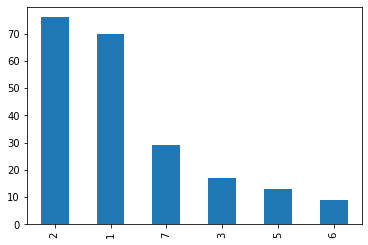

In [21]:
glass_type.plot("bar")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


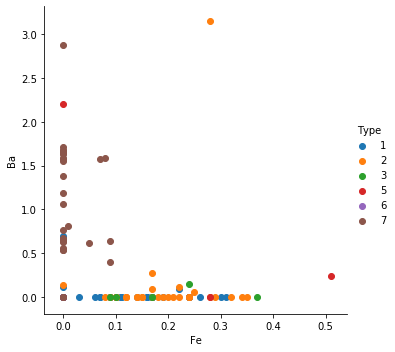

In [22]:
sns.FacetGrid(glass, hue="Type", size=5) \
   .map(plt.scatter, "Fe", "Ba") \
   .add_legend()

In [24]:
glass.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
glass_scale=StandardScaler().fit_transform(glass)


In [37]:
import pandas as pd
glass_scale_1=pd.DataFrame(glass_scale,columns=glass.columns)
glass_scale_1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275


In [38]:
glass_scale_1.pop("Type")

0     -0.848275
1     -0.848275
2     -0.848275
3     -0.848275
4     -0.848275
         ...   
209    2.010478
210    2.010478
211    2.010478
212    2.010478
213    2.010478
Name: Type, Length: 214, dtype: float64

In [39]:
glass_scale_1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [40]:
glass_scale_1.skew()

RI    1.625431
Na    0.454181
Mg   -1.152559
Al    0.907290
Si   -0.730447
K     6.551648
Ca    2.047054
Ba    3.416425
Fe    1.754327
dtype: float64

In [0]:
x=glass_scale_1

In [0]:
glass_scale_2=pd.DataFrame(glass_scale,columns=glass.columns)
y=glass_scale_2["Type"]

In [49]:
print(x.shape)
print(y.shape)

(214, 9)
(214,)


In [0]:
from sklearn.model_selection import train_test_split


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score

In [0]:
accuracy={}



In [74]:
knn=KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
y_pred=Knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

ValueError: ignored

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

K = np.sqrt(x_train.shape[0])
plusminus_range = 5 
End_Range = k + plusminus_range
Start_Range = K - plusminus_range
#mean_acc = np.zeros((Ks-1))
accuracy = {}

for n in range(Start_Range,End_Range):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_preds=knn.predict(x_test)
    accuracy[n] = accuracy_score(y_test,y_preds)
    #mean_acc[n-1] = accuracy_score(label_test,y_preds)

print(accuracy)

TypeError: ignored

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
glass=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass[glass["K"]>3]["Type"].unique()

array([5])

In [4]:
print(glass.shape)
print(glass.columns)

(214, 10)
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


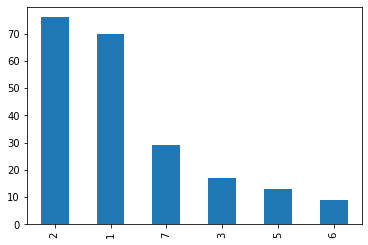

In [9]:
glass["Type"].value_counts().plot("bar")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


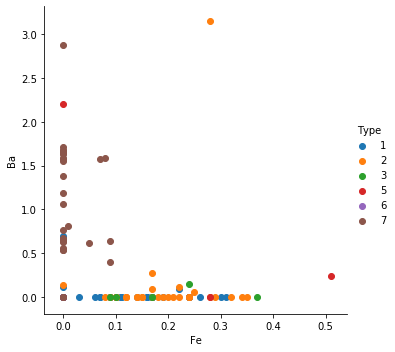

In [10]:
sns.FacetGrid(glass, hue="Type", size=5) \
   .map(plt.scatter, "Fe", "Ba") \
   .add_legend()

In [0]:
from pandas.plotting import andrews_curves

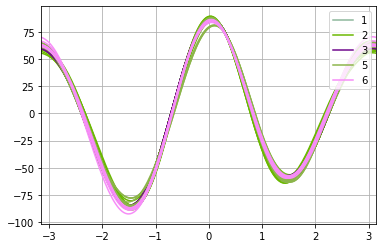

In [15]:
andrews_curves(glass[glass["Type"]!=7],"Type")

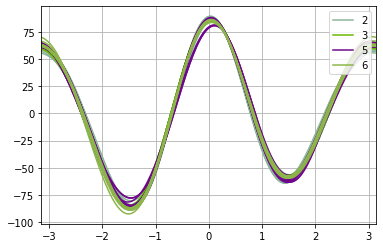

In [18]:
andrews_curves(glass[glass["Type"].isin([2,3,4,5,6])],"Type")

In [0]:
from pandas.plotting import parallel_coordinates

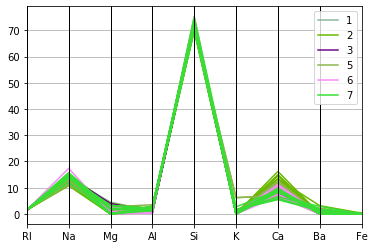

In [20]:
parallel_coordinates(glass,"Type")

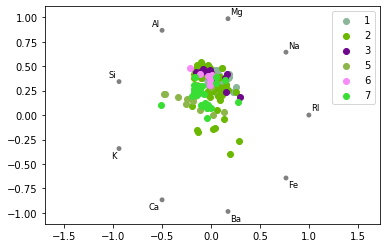

In [21]:
from pandas.plotting import radviz
radviz(glass,"Type")

In [22]:
glass.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [23]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
level=glass.pop("Type")

In [25]:
level.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [26]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
x=StandardScaler().fit_transform(glass)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,level_train,level_test=train_test_split(x,level,test_size=0.3,random_state=42)

In [34]:
print("there are {} no. of train data and {} no. of test data:".format(x_train.shape[0],x_test.shape[0]))

there are 149 no. of train data and 65 no. of test data:


In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score

In [47]:
K=int(np.sqrt(x_train.shape[0]))
plusminus_range = 5 
End_Range = K + plusminus_range
Start_Range = K - plusminus_range
accuracy={}
for n in range(Start_Range,End_Range):
  knn=KNeighborsClassifier(n_neighbors=n).fit(x_train,level_train)
  level_pred=knn.predict(x_test)
  accuracy[n]=accuracy_score(level_test,level_pred)
print(accuracy)


{7: 0.6461538461538462, 8: 0.6461538461538462, 9: 0.6153846153846154, 10: 0.6307692307692307, 11: 0.6461538461538462, 12: 0.6615384615384615, 13: 0.6461538461538462, 14: 0.6153846153846154, 15: 0.6, 16: 0.6}


In [50]:
pd.DataFrame(accuracy,index=[0]).T

,0
7,0.646154
8,0.646154
9,0.615385
10,0.630769
11,0.646154
12,0.661538
13,0.646154
14,0.615385
15,0.600000
16,0.600000


In [0]:
acc=pd.DataFrame(accuracy,index=[0])

In [59]:
acc.head()

,7,8,9,10,11,12,13,14,15,16
0,0.646154,0.646154,0.615385,0.630769,0.646154,0.661538,0.646154,0.615385,0.6,0.6


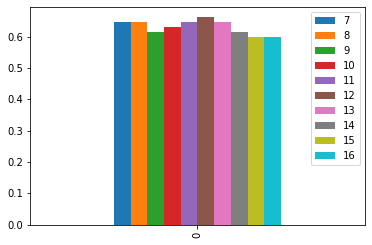

In [62]:
acc.plot(kind="bar")

In [66]:
K=int(np.sqrt(x_train.shape[0]))
plusminus_range = 5 
End_Range = K + plusminus_range
Start_Range = K - plusminus_range
accuracy={}
for n in range(Start_Range,End_Range):
  if n%2!=0:

    knn=KNeighborsClassifier(n_neighbors=n).fit(x_train,level_train)
    level_pred=knn.predict(x_test)
    accuracy[n]=accuracy_score(level_test,level_pred)
print(accuracy)

{7: 0.6461538461538462, 9: 0.6153846153846154, 11: 0.6461538461538462, 13: 0.6461538461538462, 15: 0.6}


In [68]:
K=int(np.sqrt(x_train.shape[0]))
plusminus_range = int(k*0.1) 
End_Range = K + plusminus_range
Start_Range = K - plusminus_range
accuracy={}
for n in range(Start_Range,End_Range):
  if n%2!=0:

    knn=KNeighborsClassifier(n_neighbors=n).fit(x_train,level_train)
    level_pred=knn.predict(x_test)
    accuracy[n]=accuracy_score(level_test,level_pred)
print(accuracy)

{11: 0.6461538461538462}


In [0]:
import seaborn as sns
data=pd.DataFrame(data={"accuracy":list(accuracy.values())},index=accuracy.keys())

In [0]:
data.reset_index(inplace=True)

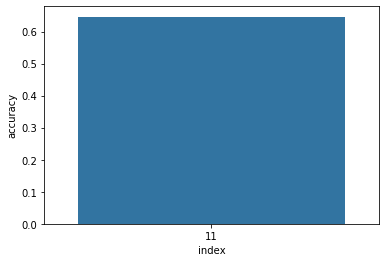

In [87]:
sns.barplot(data=data,x="index",y="accuracy")

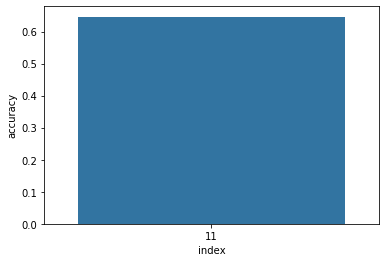

In [88]:
import seaborn as sns
dww  = pd.DataFrame(data={'accuracy':list(accuracy.values())}, index = accuracy.keys())
dww.reset_index(inplace=True)
sns.barplot(x='index', y='accuracy',data=dww,)

In [89]:
accuracy


{11: 0.6461538461538462}

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg=LogisticRegression()

In [92]:
logreg.fit(x_train,level_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
level_pred1=logreg.predict(x_test)

In [0]:
log_accuracy=accuracy_score(level_test,level_pred1)

In [95]:
log_accuracy

0.676923076923077

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn=KNeighborsClassifier()

In [98]:
knn.fit(x_train,level_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
level_pred_2=knn.predict(x_test)

In [100]:
knn_accuracy=accuracy_score(level_test,level_pred_2)
knn_accuracy

0.6461538461538462

In [0]:
model=pd.DataFrame({"Logistic_Regression":[log_accuracy],"knn":[knn_accuracy]})

In [103]:
model

,Logistic_Regression,knn
0,0.676923,0.646154


In [0]:
Iris=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/Iris.csv")

In [105]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
Iris.shape

(150, 6)

In [107]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [108]:
Iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64